In [1]:
import numpy as np
import find_alpha
import matplotlib.pyplot as plt

In [2]:
f_0 = 300
mu = 8e5
a = 0
b = 1e-2
N = 100
t_ax = np.linspace(a,b,N)

x_t = lambda t : np.cos(2 * np.pi * f_0 * t + mu * t**2)

beta_0 = 3e3
A = 0.5
dt = 2e-3

kernel = lambda t, beta : np.exp(- beta * t) + A * np.exp(- beta * t - dt)

kernel_0 = kernel(t_ax, beta_0)
kernel_5 = kernel(t_ax, beta_0 * 1.05)
kernel_10 = kernel(t_ax, beta_0 * 0.9)

In [3]:
def conv(kernel, func):
    result = np.zeros(len(func))
    F = np.flip(func, 0)
    for i in range(len(func)):
        result[i] = np.sum(kernel * np.roll(F, i + 1))
    return result

In [4]:
right_part = find_alpha.conv(kernel_0, x_t(t_ax))
kernel_fft = np.fft.fft(kernel_5)
m_omega = lambda omega: omega ** 2 + 1e-4
freq_ax = np.fft.fftfreq(len(t_ax), t_ax[1] - t_ax[0])
m_ar = m_omega(freq_ax)

In [5]:
#методом приращений
sigma = 1e-1
N = 1000
epoch = 1000
alpha_range = np.linspace(1e-14, 1e-13, N)
alpha_opt_5 = np.zeros(epoch)
for i in range(epoch):
    sol_ar = np.zeros((N, len(t_ax)))
    noise = np.random.normal(0, sigma)
    right_noisy = right_part + noise
    right_fft = np.fft.fft(right_noisy)
    for j in range(N):
        sol_ar[j] = find_alpha.fourier_solve(kernel_fft, right_fft, m_ar, alpha_range[j])
    sol_ar = np.diff(sol_ar, axis=0)
    sol_ar = np.linalg.norm(sol_ar, axis=1)
    alpha_opt_5[i] = alpha_range[np.argmin(sol_ar)]

(array([  2.,   1.,   4.,  11.,   7.,  19.,  77.,  72., 528., 279.]),
 array([7.14414414e-14, 7.42882883e-14, 7.71351351e-14, 7.99819820e-14,
        8.28288288e-14, 8.56756757e-14, 8.85225225e-14, 9.13693694e-14,
        9.42162162e-14, 9.70630631e-14, 9.99099099e-14]),
 <BarContainer object of 10 artists>)

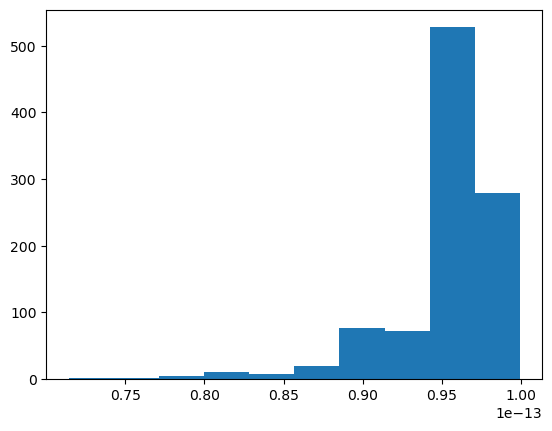

In [6]:
plt.hist(alpha_opt_5)

In [7]:
right_part = find_alpha.conv(kernel_0, x_t(t_ax))
kernel_fft = np.fft.fft(kernel_10)
m_omega = lambda omega: omega ** 2 + 1e-4
freq_ax = np.fft.fftfreq(len(t_ax), t_ax[1] - t_ax[0])
m_ar = m_omega(freq_ax)

In [8]:
alpha_opt_10 = np.zeros(epoch)

In [9]:
for i in range(epoch):
    sol_ar = np.zeros((N, len(t_ax)))
    noise = np.random.normal(0, sigma)
    right_noisy = right_part + noise
    right_fft = np.fft.fft(right_noisy)
    for j in range(N):
        sol_ar[j] = find_alpha.fourier_solve(kernel_fft, right_fft, m_ar, alpha_range[j])
    sol_ar = np.diff(sol_ar, axis=0)
    sol_ar = np.linalg.norm(sol_ar, axis=1)
    alpha_opt_10[i] = alpha_range[np.argmin(sol_ar)]

(array([  2.,   0.,  12.,  10.,  20.,  57.,  52., 172., 184., 491.]),
 array([7.71171171e-14, 7.93963964e-14, 8.16756757e-14, 8.39549550e-14,
        8.62342342e-14, 8.85135135e-14, 9.07927928e-14, 9.30720721e-14,
        9.53513514e-14, 9.76306306e-14, 9.99099099e-14]),
 <BarContainer object of 10 artists>)

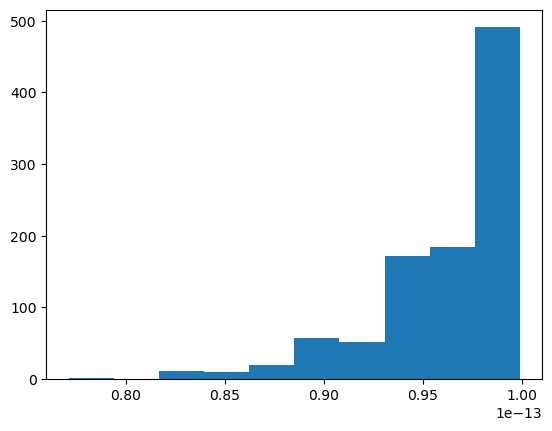

In [10]:
plt.hist(alpha_opt_10)

In [11]:
right_part = find_alpha.conv(kernel_0, x_t(t_ax))
kernel_fft = np.fft.fft(kernel_0)
m_omega = lambda omega: omega ** 2 + 1e-4
freq_ax = np.fft.fftfreq(len(t_ax), t_ax[1] - t_ax[0])
m_ar = m_omega(freq_ax)
alpha_opt_0 = np.zeros(epoch)
for i in range(epoch):
    sol_ar = np.zeros((N, len(t_ax)))
    noise = np.random.normal(0, sigma)
    right_noisy = right_part + noise
    right_fft = np.fft.fft(right_noisy)
    for j in range(N):
        sol_ar[j] = find_alpha.fourier_solve(kernel_fft, right_fft, m_ar, alpha_range[j])
    sol_ar = np.diff(sol_ar, axis=0)
    sol_ar = np.linalg.norm(sol_ar, axis=1)
    alpha_opt_0[i] = alpha_range[np.argmin(sol_ar)]

(array([  1.,  16.,  14.,   5.,   9.,  18.,  84., 193., 340., 320.]),
 array([7.36936937e-14, 7.63063063e-14, 7.89189189e-14, 8.15315315e-14,
        8.41441441e-14, 8.67567568e-14, 8.93693694e-14, 9.19819820e-14,
        9.45945946e-14, 9.72072072e-14, 9.98198198e-14]),
 <BarContainer object of 10 artists>)

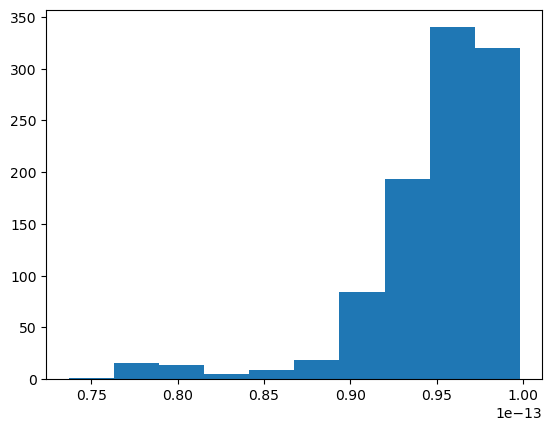

In [12]:
plt.hist(alpha_opt_0)

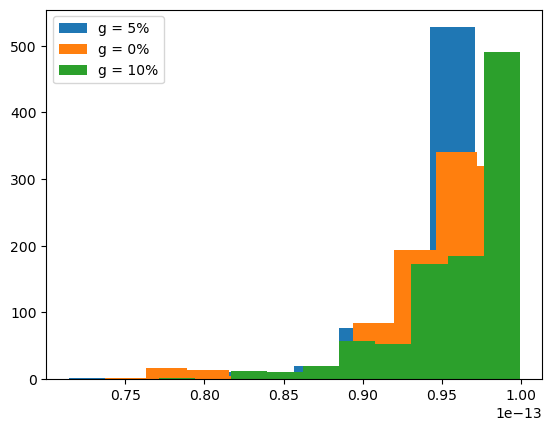

In [14]:
plt.hist(alpha_opt_5, label = r'g = 5%')
plt.hist(alpha_opt_0, label = r'g = 0%')
plt.hist(alpha_opt_10, label = r'g = 10%')
plt.legend()

Первым методом


In [21]:
beta_0_9 = np.load('../7_10/beta_0_9.npy')
beta_1 = np.load('../7_10/beta_1.npy')
beta_1_05 = np.load('../7_10/beta_1_05.npy')
print(len(beta_1))

1000


(array([  5.,   7.,   5.,  18.,  39., 103., 158., 371., 225.,  69.]),
 array([1.09997038e-12, 1.09997241e-12, 1.09997445e-12, 1.09997649e-12,
        1.09997853e-12, 1.09998057e-12, 1.09998261e-12, 1.09998464e-12,
        1.09998668e-12, 1.09998872e-12, 1.09999076e-12]),
 <BarContainer object of 10 artists>)

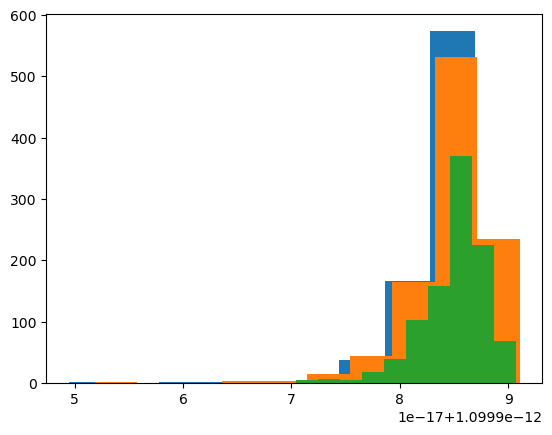

In [20]:
plt.hist(beta_0_9)
plt.hist(beta_1_05)
plt.hist(beta_1)

(array([  5.,   7.,   5.,  18.,  39., 103., 158., 371., 225.,  69.]),
 array([1.09997038e-12, 1.09997241e-12, 1.09997445e-12, 1.09997649e-12,
        1.09997853e-12, 1.09998057e-12, 1.09998261e-12, 1.09998464e-12,
        1.09998668e-12, 1.09998872e-12, 1.09999076e-12]),
 <BarContainer object of 10 artists>)

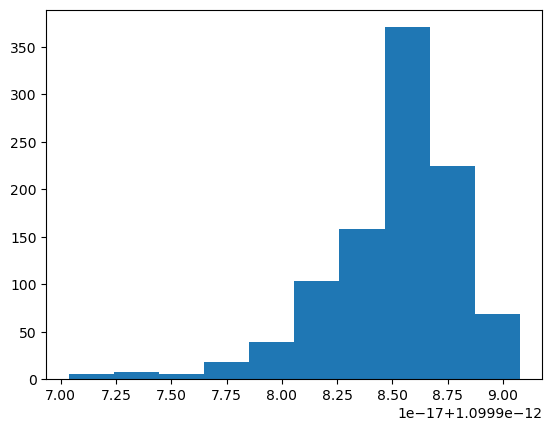

In [22]:
plt.hist(beta_1)